#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 02
**CH02A Finding a good deal among hotels: data preparation**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read data

In [2]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/hotelbookingdata.csv")

In [3]:
df.head()        # Look at the first 5 rows

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [4]:
df.tail(10)            # Check the last few rows

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
149956,Croatia,Zagreb,24.0,3.3 miles,City centre,3.3 miles,Zagreb City Museum,Zagreb,94,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,1,22901.0,0,0% no offer,2017,12,0,1
149957,Croatia,Zagreb,24.0,3.3 miles,City centre,3.3 miles,Zagreb City Museum,Zagreb,94,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,1,22901.0,0,0% no offer,2017,11,0,0
149958,Croatia,Zagreb,24.0,3.3 miles,City centre,3.3 miles,Zagreb City Museum,Zagreb,94,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,1,22901.0,0,0% no offer,2017,11,1,0
149959,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,149,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,1,1,0
149960,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,2,1,0
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2017,11,0,0
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,4,1,0
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2018,3,1,0
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2017,12,0,1
149965,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,117,price for 1 night,...,_ACCOM_TYPE@Hotel,4.5 /5,1,22902.0,1,15-50% offer,2017,12,0,1


In [5]:
df.shape         # Number of rows and columns

(149966, 24)

In [6]:
df.columns   # List of column names

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday'],
      dtype='object')

In [7]:
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149966 entries, 0 to 149965
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   addresscountryname      149966 non-null  object 
 1   city_actual             149966 non-null  object 
 2   rating_reviewcount      139379 non-null  float64
 3   center1distance         149966 non-null  object 
 4   center1label            149966 non-null  object 
 5   center2distance         149852 non-null  object 
 6   center2label            149852 non-null  object 
 7   neighbourhood           149966 non-null  object 
 8   price                   149966 non-null  int64  
 9   price_night             149966 non-null  object 
 10  s_city                  149966 non-null  object 
 11  starrating              149966 non-null  float64
 12  rating2_ta              136929 non-null  float64
 13  rating2_ta_reviewcount  136929 non-null  float64
 14  accommodationtype   

In [8]:
df.describe() 

,rating_reviewcount,price,starrating,rating2_ta,rating2_ta_reviewcount,scarce_room,hotel_id,offer,year,month,weekend,holiday
count,139379.000000,149966.000000,149966.000000,136929.000000,136929.000000,149966.000000,149852.000000,149966.000000,149966.000000,149966.000000,149966.000000,149966.000000
mean,159.733116,179.144773,2.745519,3.930720,496.560736,0.526933,10759.975496,0.584266,2017.578604,6.870251,0.665498,0.218009
std,249.472256,255.627483,1.496320,0.647602,740.416380,0.499276,6537.636897,0.492850,0.493784,4.183573,0.471818,0.412895
min,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,0.000000,0.000000
25%,25.000000,74.000000,2.000000,3.500000,65.000000,0.000000,5236.000000,0.000000,2017.000000,3.000000,0.000000,0.000000
50%,79.000000,113.000000,3.000000,4.000000,230.000000,1.000000,10433.000000,1.000000,2018.000000,6.000000,1.000000,0.000000
75%,191.000000,192.000000,4.000000,4.500000,627.000000,1.000000,15131.250000,1.000000,2018.000000,11.000000,1.000000,0.000000
max,4300.000000,39996.000000,5.000000,5.000000,17139.000000,1.000000,22902.000000,1.000000,2018.000000,12.000000,1.000000,1.000000


In [9]:
df.isnull().sum()   

addresscountryname            0
city_actual                   0
rating_reviewcount        10587
center1distance               0
center1label                  0
center2distance             114
center2label                114
neighbourhood                 0
price                         0
price_night                   0
s_city                        0
starrating                    0
rating2_ta                13037
rating2_ta_reviewcount    13037
accommodationtype             0
guestreviewsrating        10587
scarce_room                   0
hotel_id                    114
offer                         0
offer_cat                     0
year                          0
month                         0
weekend                       0
holiday                       0
dtype: int64

In [10]:
df.shape

(149966, 24)

In [11]:
df=df.dropna()

In [12]:
df.shape

(132005, 24)

In [13]:
df.duplicated().sum()

np.int64(1714)

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(130291, 24)

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [17]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday'],
      dtype='object')

In [18]:
df['price'].describe()

count    130291.000000
mean        174.573762
std         242.470819
min          11.000000
25%          75.000000
50%         113.000000
75%         191.000000
max       39996.000000
Name: price, dtype: float64

In [19]:
df[df['price'] > 10000] 

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
78166,Belarus,Minsk,2.0,1.6 miles,City centre,0.9 miles,Palats Mastatsva (Art Palace),Minsk,39996,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.5 /5,1,10921.0,0,0% no offer,2017,12,0,1
110328,Czech Republic,Prague,2.0,3.0 miles,City centre,2.9 miles,Astronomical Clock,Prague,14859,price for 4 nights,...,_ACCOM_TYPE@Hotel,1.5 /5,1,14797.0,0,0% no offer,2017,12,0,1


<Axes: title={'center': 'rating_reviewcount'}, xlabel='price'>

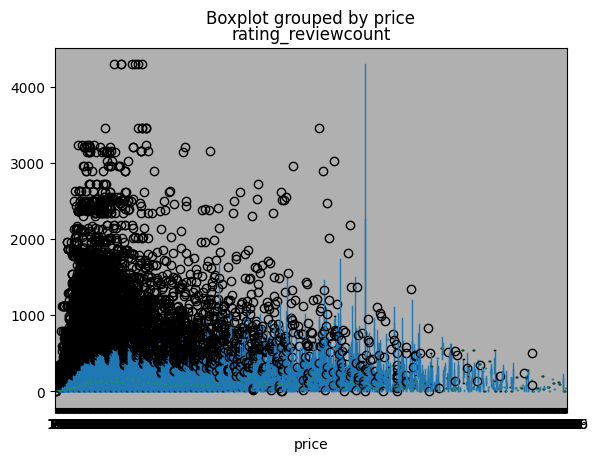

In [20]:

df.boxplot(column='rating_reviewcount', by='price')

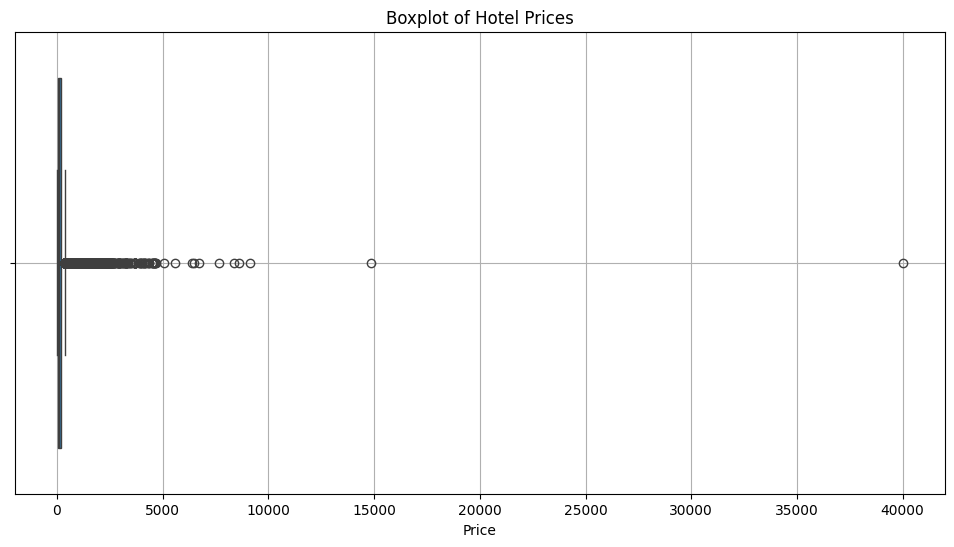

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Hotel Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


<Axes: xlabel='addresscountryname', ylabel='price'>

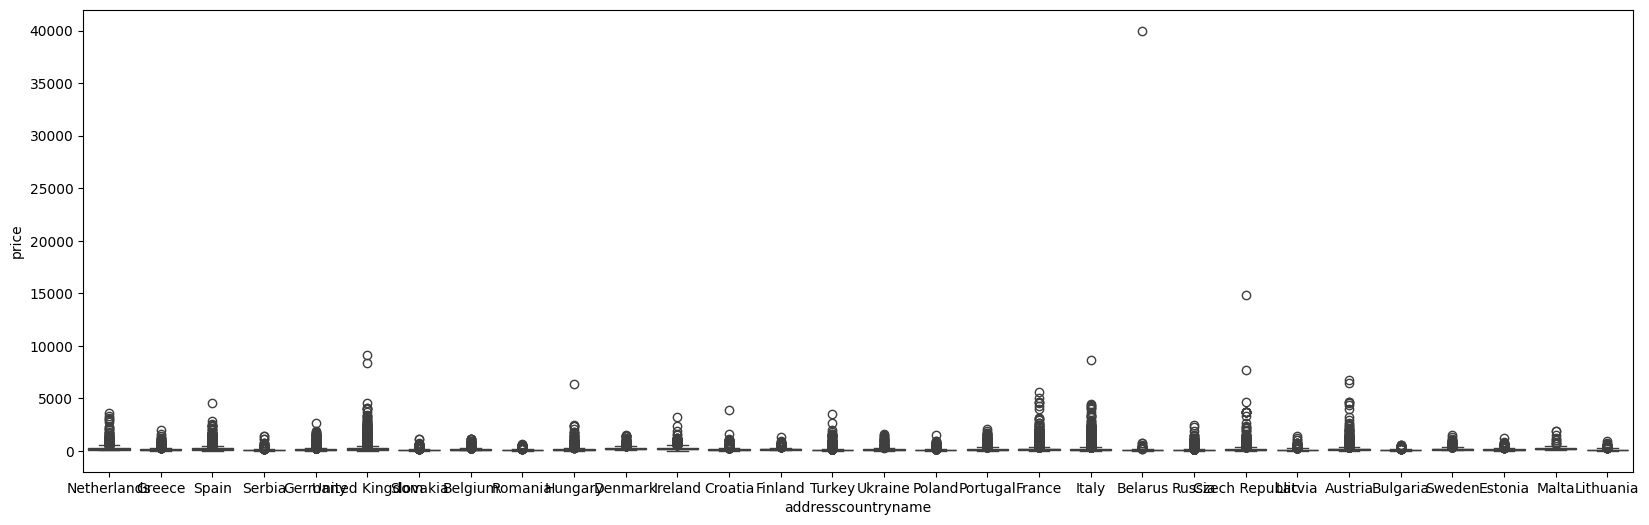

In [22]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='addresscountryname', y='price', data=df)




In [23]:
x = df.index
y = df['price']
plt.bar(x,y)
plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x78dfb6b7b350>>
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Text(0, 0.5, 'your y-axis label')

Error in callback <function flush_figures at 0x78df72459120> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

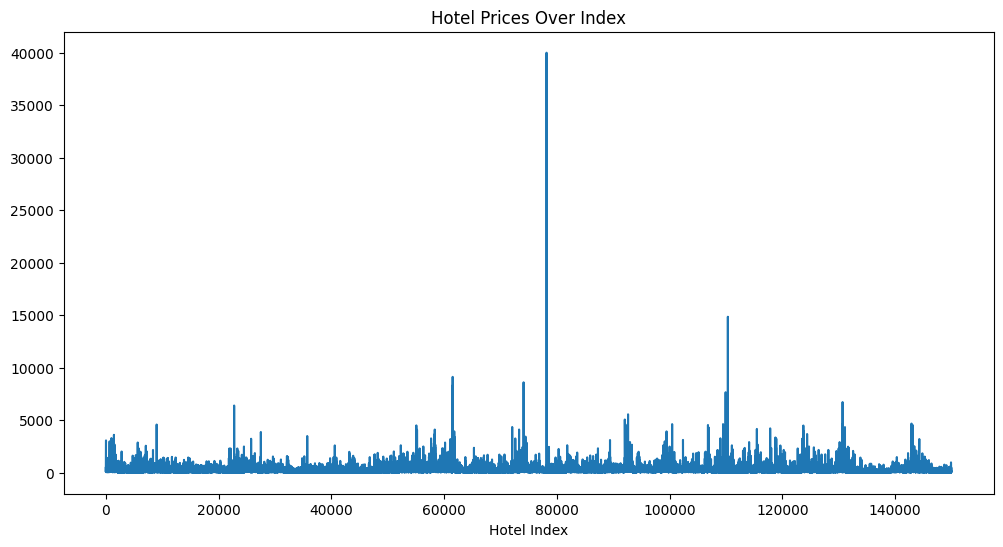

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'])
plt.xlabel('Hotel Index')
plt.title('Hotel Prices Over Index')
plt.show()


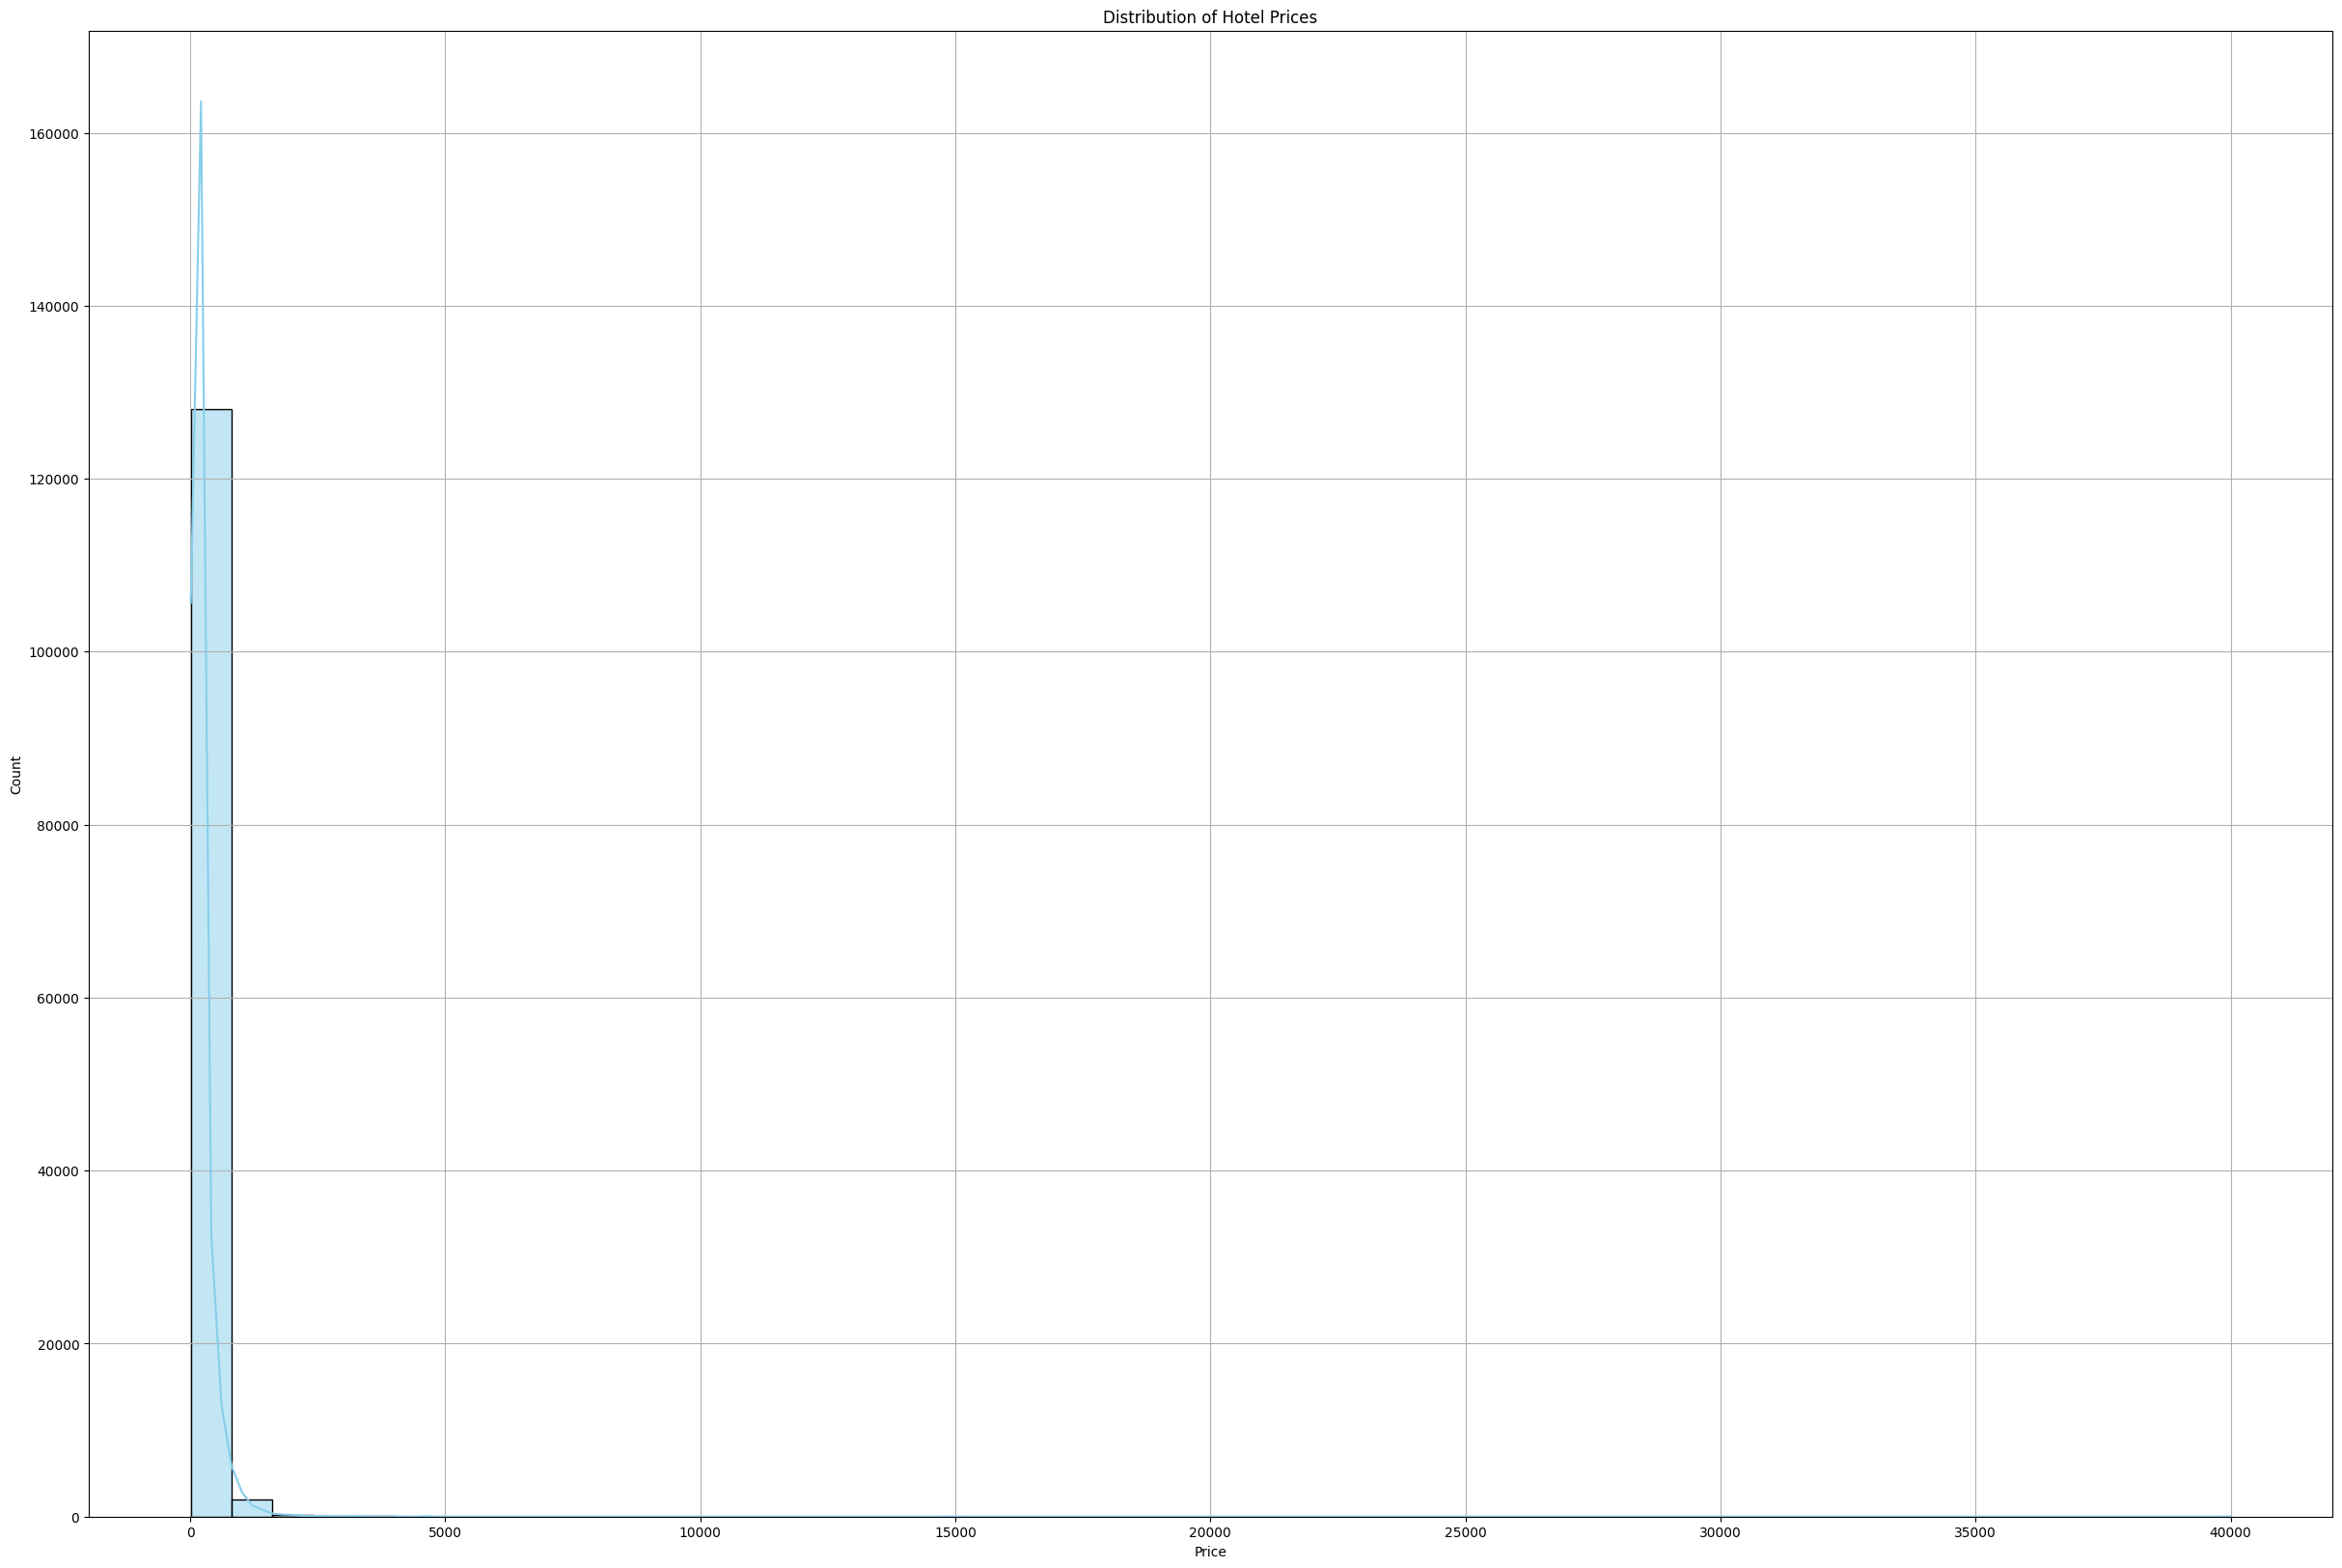

In [26]:
plt.figure(figsize=(30, 20))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Hotel Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**********************************************
### Table 1.1
**********************************************


In [ ]:
data.head()

NameError: name 'data' is not defined

**********************************************
### Table 2.2
**********************************************


In [ ]:
# data types stored in the data file 
# different way of "type", than in the book
data.dtypes

hotel_id                int64
accommodation_type     object
distance              float64
stars                 float64
rating                float64
rating_count          float64
price                   int64
dtype: object

In [ ]:
data.iloc[1]

hotel_id              21897
accommodation_type    Hotel
distance                1.7
stars                   4.0
rating                  3.9
rating_count          189.0
price                    81
Name: 1, dtype: object

**********************************************
### Table 2.3
**********************************************


In [ ]:
data = data.loc[data["accommodation_type"] == "Hotel"]

In [ ]:
data.shape[0]

264

In [ ]:
data[["hotel_id","price","distance"]].head(3)

,hotel_id,price,distance
1,21897,81,1.7
2,21901,85,1.4
3,21902,83,1.7


## PART B: repeat part of the cleaning code
using the raw csv data file
 includes some additional output
*********************************************************

*IMPORT AND PREPARE DATA*

variables downoaded as string, often in form that is not helpful
need to transform then to numbers that we can use

In [ ]:
data = pd.read_csv(data_in_raw + "hotelbookingdata-vienna.csv")
#data = pd.read_csv( "https://osf.io/g5dmw/download" )

In [ ]:
# distance to center entered as string in miles with one decimal
data["distance"] = data["center1distance"].str.split(" ").apply(lambda x: float(x[0]))
data["distance_alter"] = (
    data["center2distance"].str.split(" ").apply(lambda x: float(x[0]))
)

In [ ]:
data["accommodation_type"] = (
    data["accommodationtype"].str.split("@").apply(lambda x: x[1]).str.strip()
)

In [ ]:
data["nnight"] = data["price_night"].str.split(" ").apply(lambda x: int(x[2]))

In [ ]:
# generate numerical variable of rating variable from string variable
data["rating"] = (
    data["guestreviewsrating"]
    .str.split(" ")
    .apply(lambda x: float(x[0]) if type(x) == list else None)
)

In [ ]:
# quick function, similar to Stata tab
def tabulate(series, drop_missing=False):
    table = (
        pd.concat(
            [
                series.value_counts(dropna=drop_missing)
                .sort_index()
                .round(2)
                .rename("Freq."),
                series.value_counts(normalize=True, dropna=drop_missing)
                .sort_index()
                .rename("Perc."),
            ],
            axis=1,
        )
        .assign(Cum=lambda x: x["Perc."].cumsum())
        .round(3)
    )
    return table

In [ ]:
# check: frequency table of all values incl. missing varlues
tabulate(data["rating"])

,Freq.,Perc.,Cum
1.0,3,0.007,0.007
2.0,4,0.009,0.016
2.2,4,0.009,0.026
2.5,1,0.002,0.028
2.7,2,0.005,0.033
3.0,12,0.028,0.060
3.2,14,0.033,0.093
3.4,6,0.014,0.107
3.5,30,0.070,0.177
3.7,43,0.100,0.277


In [ ]:
# check: frequency table of all values incl. missing varlues
tabulate(data["rating_reviewcount"])

,Freq.,Perc.,Cum
1.0,15,0.035,0.035
2.0,9,0.021,0.056
3.0,9,0.021,0.077
4.0,1,0.002,0.079
5.0,5,0.012,0.091
...,...,...,...
923.0,1,0.002,0.912
985.0,1,0.002,0.914
1122.0,1,0.002,0.916
1541.0,1,0.002,0.919


In [ ]:
data["rating_count"] = data["rating_reviewcount"].apply(float)
data["rating_count"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating_count,395.0,155.293671,191.296684,1.0,26.5,84.0,203.0,1541.0


*RENAME VARIABLES*

In [ ]:
data = data.rename(
    columns={
        "rating2_ta": "ratingta",
        "rating2_ta_reviewcount": "ratingta_count",
        "addresscountryname": "country",
        "s_city": "city",
        "starrating": "stars",
    }
)

In [ ]:
# look at key variables
tabulate(data["stars"])

,Freq.,Perc.,Cum
1.0,1,0.002,0.002
2.0,47,0.109,0.112
2.5,5,0.012,0.123
3.0,141,0.328,0.451
3.5,57,0.133,0.584
4.0,144,0.335,0.919
4.5,8,0.019,0.937
5.0,27,0.063,1.000


In [ ]:
tabulate(data["rating"],drop_missing=True)

,Freq.,Perc.,Cum
1.0,3,0.008,0.008
2.0,4,0.010,0.018
2.2,4,0.010,0.028
2.5,1,0.003,0.030
2.7,2,0.005,0.035
3.0,12,0.030,0.066
3.2,14,0.035,0.101
3.4,6,0.015,0.116
3.5,30,0.076,0.192
3.7,43,0.109,0.301


In [ ]:
data = data.drop(
    columns=[
        "center2distance",
        "center1distance",
        "price_night",
        "guestreviewsrating",
        "rating_reviewcount",
    ]
)

**********************************************
### Table 2.10
**********************************************


In [ ]:
# Look for perfect duplicates
data = data.sort_values(by=["hotel_id"])
data[data["hotel_id"].duplicated(keep=False)][
    [
        "hotel_id",
        "accommodation_type",
        "price",
        "distance",
        "stars",
        "rating",
        "rating_count",
    ]
]

,hotel_id,accommodation_type,price,distance,stars,rating,rating_count
128,22050,Hotel,242,0.0,4.0,4.8,404.0
129,22050,Hotel,242,0.0,4.0,4.8,404.0
242,22185,Hotel,84,0.8,3.0,2.2,3.0
241,22185,Hotel,84,0.8,3.0,2.2,3.0


In [ ]:
# drop the duplicate values
data = data.drop_duplicates()

**********************************************
### Missing values in text
***********************************************

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,428.0,131.366822,91.580545,27.0,83.00,109.5,146.00,1012.0
stars,428.0,3.434579,0.772278,1.0,3.00,3.5,4.00,5.0
ratingta,325.0,3.990769,0.482638,2.0,3.50,4.0,4.50,5.0
ratingta_count,325.0,556.516923,586.874582,2.0,129.00,335.0,811.00,3171.0
scarce_room,428.0,0.598131,0.490850,0.0,0.00,1.0,1.00,1.0
hotel_id,428.0,22153.502336,146.858477,21894.0,22027.75,22155.5,22279.25,22409.0
offer,428.0,0.679907,0.467058,0.0,0.00,1.0,1.00,1.0
year,428.0,2017.000000,0.000000,2017.0,2017.00,2017.0,2017.00,2017.0
month,428.0,11.000000,0.000000,11.0,11.00,11.0,11.00,11.0
weekend,428.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [ ]:
print(data["rating"].isnull().sum())
data["misrating"] = data["rating"].isnull()

35


In [ ]:
tabulate(data["misrating"])

,Freq.,Perc.,Cum
False,393,0.918,0.918
True,35,0.082,1.000


In [ ]:
pd.crosstab(data["accommodation_type"], data["misrating"], margins=True)

misrating,False,True,All
accommodation_type,,,
Apart-hotel,4,0,4
Apartment,92,32,124
Bed and breakfast,4,0,4
Guest House,7,1,8
Hostel,6,0,6
Hotel,263,1,264
Pension,16,0,16
Vacation home Condo,1,1,2
All,393,35,428


In [ ]:
pd.crosstab(
    index=data["accommodation_type"],
    columns=data["misrating"],
    values=data["price"],
    aggfunc="mean",
    margins=True,
).round(2)

misrating,False,True,All
accommodation_type,,,
Apart-hotel,121.25,NaN,121.25
Apartment,136.45,179.06,147.44
Bed and breakfast,118.25,NaN,118.25
Guest House,71.00,103.00,75.00
Hostel,53.67,NaN,53.67
Hotel,130.02,106.00,129.93
Pension,96.06,NaN,96.06
Vacation home Condo,107.00,116.00,111.50
All,127.66,173.00,131.37


In [ ]:
data.loc[
    (data["misrating"] == 1) & (data["accommodation_type"] == "Hotel"),
    [
        "hotel_id",
        "accommodation_type",
        "price",
        "distance",
        "stars",
        "rating",
        "rating_count",
    ],
]

,hotel_id,accommodation_type,price,distance,stars,rating,rating_count
14,21916,Hotel,106,0.7,2.5,NaN,NaN
